# Tutorial

<b>Warning: it is necessary to use <u>setups='sg15'</u> in GPAW</b> (ONCV pseudopotentials)

In [1]:
from gpaw import GPAW, FermiDirac
from gpaw.wavefunctions.pw import PW
from ase.io import read
from TDDFT import TDDFT
import numpy as np
from tqdm import tqdm
from ase.units import Hartree, Bohr
import matplotlib.pyplot as plt
from gpaw.external import ConstantElectricField
%matplotlib inline

c = 20
PW_cut=600
atoms = read('hBN.cif')
atoms.cell[2,2]=c
atoms.center()

calc = GPAW(mode=PW(PW_cut),xc='PBE',
            kpts={'size': (30, 30, 1)},
            setups='sg15',
            occupations=FermiDirac(0.0001))

atoms.set_calculator(calc)
atoms.get_potential_energy()
calc.write('gs_sg15.gpw')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.1
 |___|_|             

User:   drg@forsite
Date:   Wed Apr  3 18:14:12 2019
Arch:   x86_64
Pid:    24550
Python: 3.6.7
gpaw:   /usr/local/lib/python3.6/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.6/dist-packages/
        _gpaw.cpython-36m-x86_64-linux-gnu.so
ase:    /home/drg/.local/lib/python3.6/site-packages/ase (version 3.17.0)
numpy:  /home/drg/.local/lib/python3.6/site-packages/numpy (version 1.16.2)
scipy:  /home/drg/.local/lib/python3.6/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: {size: (30, 30, 1)}
  mode: {ecut: 600.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.0001}
  setups: sg15
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Norm-conserving UPF setup:
  Element:    B
  Z:          5
  Valence:  3

# Initialization 

In [2]:
from TDDFT import TDDFT
tddft=TDDFT(calc)

/home/drg/test/RT-LG-TDDFT-2/TDDFT.py:76: RuntimeWarning: overflow encountered in exp
  self.f=1/(1+np.exp((self.EK-self.Fermi)/self.temperature))
100%|██████████| 450/450 [1:20:23<00:00, 10.82s/it]


# Calculation of the dipole matrix
Сalculation of the dipole matrix occurs according to the following equation
$$ d_{nm}(k)=\int_\Omega dr \; u_{kn}^{*}(r) \; r \; u_{km}(r)$$
where $u_{kn}(r)$ - periodic part of Kohn-Sham wavefunction which is stored in <b>TDDFT.ukn</b>

$r$ - coordinate inside the elementary cell which is stored in <b>TDDFT.r</b>

$\Omega$ - volume of the elementary cell which is stored in <b>TDDFT.volume</b>

In [3]:
import matplotlib.pyplot as plt

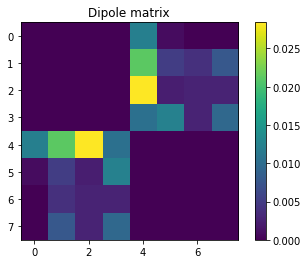

In [4]:
direction=[0,0,1]
dipole=tddft.get_transition_matrix(direction)
plt.title("Dipole matrix")
plt.imshow(np.abs(np.sum(tddft.wk[:,None,None]*dipole,axis=0)))
plt.colorbar()

# TDDFT

In [5]:
dt=0.1;steps=100000;
E=np.zeros(steps);
time=np.arange(steps)*dt
E=1*np.exp(-time/dt)
result=tddft.propagate(dt=dt,steps=steps,E=E,direction=[0,0,1])

 66%|██████▋   | 66415/99999 [17:06:24<8:45:33,  1.07it/s] 

KeyboardInterrupt: 

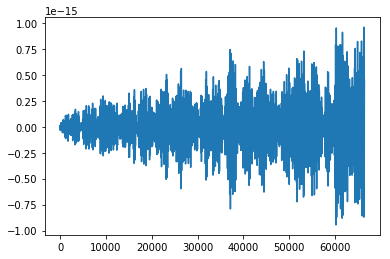

In [7]:
plt.plot(tddft.polarization[:66415])

In [8]:
spectrum=np.fft.fft(tddft.polarization[:66415])
freq = np.fft.fftfreq(66415, d=dt)*2*np.pi*Hartree
spectrum=spectrum[np.argsort(freq)]
freq=np.sort(freq)
spectrum=np.abs(spectrum*freq)**2

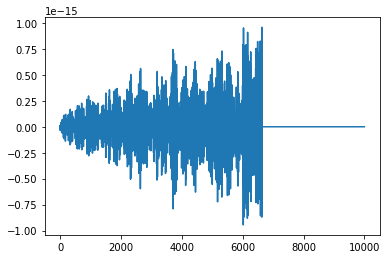

In [9]:
plt.plot(time,tddft.polarization)

In [10]:
from scipy.ndimage.filters import gaussian_filter1d

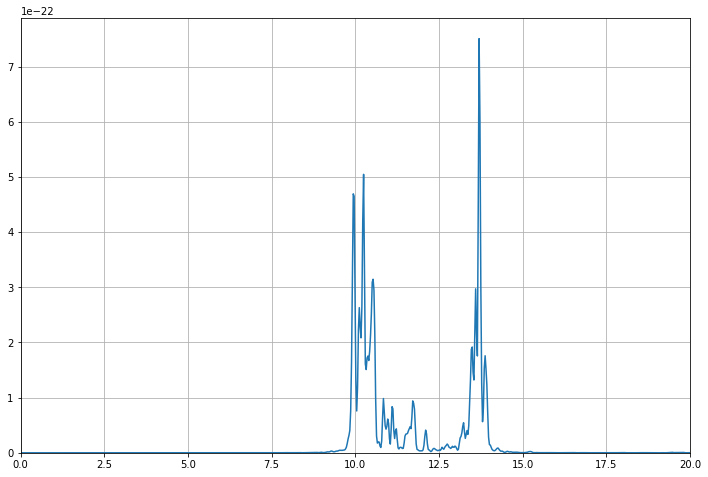

In [13]:
plt.figure(figsize=(12,8))
# plt.plot(omega*Hartree,epsilon.imag)
plt.plot(freq,gaussian_filter1d(spectrum,1),'-')
# plt.plot(data[inds_w, 0], 4 * np.pi * data[inds_w, 4],label='real')
# plt.legend(loc='best')
plt.xlim([0,20])
plt.ylim([0,None])
plt.grid()
plt.savefig('spectrum_.png')

In [14]:
from DensityMatrix import DensityMatrix